In [1]:
using Plots
using Interact

In [2]:
function rk4(f, dt, tk, yk)
    f1 = f(tk, yk)
    f2 = f(tk + dt/2, yk + (dt/2) * f1)
    f3 = f(tk + dt/2, yk + (dt/2) * f2)
    f4 = f(tk + dt, yk + dt * f3)
    
    return yk + (dt/6) * (f1 + 2*f2 + 2*f3 + f4)
end

rk4 (generic function with 1 method)

In [3]:
function lorenz(t, y, a, b, c)
    return [
        a * (y[2] - y[1]),
        c * y[1] - y[2] - y[1] * y[3],
        y[1] * y[2] - b * y[3]
    ]
end

lorenz (generic function with 1 method)

Interact.Textbox{Int64}(131: "input-36" = 10 Int64 , "sigma", nothing, 10)

Interact.Textbox{Int64}(133: "input-37" = 28 Int64 , "rho", nothing, 28)

Interact.Textbox{Int64}(135: "input-38" = 2 Int64 , "beta", nothing, 2)

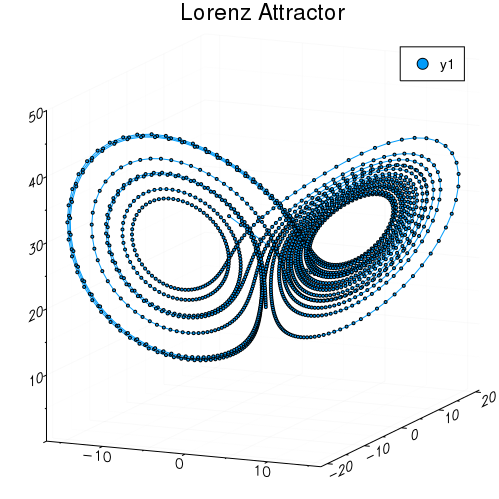

In [40]:
@manipulate for sigma in 10, rho in 28, beta in 2
    points = 2000

    state0 = [-8.0, 8.0, 27]
    dt = 0.01

    Y = []
    push!(Y, state0)
    yin = state0
    tspan = 0:dt:points*dt
    
    for i in 0:points
        time = i*dt
        yout = rk4((x, y) -> lorenz(x, y, sigma, beta, rho), dt, time, yin)
        push!(Y, yout)
        yin = yout
    end

    p = plot3d(getindex.(Y, 1), getindex.(Y, 2), getindex.(Y, 3),title = "Lorenz Attractor",  marker = 2,
    size=(500,500,500), html_output_format=:png)
end